# Assignment 0: Setup Test

Run this notebook to show us that you have successfully installed the libraries you need for this course.

If you get errors that you cannot solve, you're welcome to contact the TAs for help.

## Important Note

**There is a Q&A session on Wednesday the 1st of October at 15:15 in room 6K1101/6K1107.** Everyone is free to attend and ask any questions regarding the setup process, Python, and/or the libraries we use.

In [25]:
%pip install scipy==1.11.4
%pip install pandas==2.2.3
%pip install scikit-learn==1.5.2
%pip install torch==2.4.1
%pip install torchvision==0.19.1

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [26]:
import hashlib
from scipy.integrate import *
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import torch
import imageio.v3 as iio
import furhat_remote_api
import transformers
import google.generativeai as genai
import matplotlib.pyplot as plt
import feat

In [27]:
from torchvision import transforms

# Remove warnings
PyFeat may throw (a lot of) warnings with newer versions of Python. Adding the following lines to your script will remove **all** its warnings.

**NOTE:** this may also remove useful warnings. If you see some bugs in your program it is advisable to comment the lines and look closely at the warnings.

In [28]:
import warnings

warnings.filterwarnings("ignore", module="feat")

If you want to achieve the same on a project level, you can set the following environmental variable. For example, in linux/macos:
```bash
export PYTHONWARNINGS="ignore:::feat"
```
In Windows:
```cmd
set PYTHONWARNINGS=ignore:::feat
```

## Your Name

Is all we need today. Just write your own name between the quote marks (`"`) below:

In [29]:
NAME =  'Abhinav Ramalingam'

## Let it Run

Did you already write your name above? Good! Then all you have to do is run the rest of the notebook, and write down some data for us.

In [30]:
def munch_name(name: str) -> int:
    """Returns a stable hash of `name`, as an unsigned 64 bit integer."""
    clean_name = name.strip().title().encode("utf-8") # Normalize name format and encode.
    md5_hash = int(hashlib.md5(clean_name).hexdigest(), 16) # Use MD5 to obtain a 128-bit signed integer hash.
    clamped_hash = (md5_hash % 0xffff_ffff_ffff_ffff) # Clamp it to 64-bit unsigned integer range.
    return clamped_hash

In [31]:
magic = munch_name(NAME)

high_magic = (magic >> 32) # Upper 32 bits. Used to seed the NumPy random number generator.
low_magic = (magic & 0xff_ff_ff_ff) # Lower 32 bits. Used to seed the PyTorch random number generator.

print(f"Magic: 0x{magic:019_X}")

Magic: 0x831C_FEC2_AFCD_4795


In [32]:
rng = np.random.default_rng(seed=high_magic)
print(f"Your lucky number is: {rng.integers(100)}")

Your lucky number is: 27


In [33]:
torch.random.manual_seed(seed=low_magic)
print(f"Your cursed number is: {torch.randint(low=0, high=100, size=())}")

Your cursed number is: 84


### Robert De Niro Fan Club

Let's take a look at his movies!

In [34]:
data = pd.read_csv("de-niro.csv", skipinitialspace=True)
data

,Year,Score,Title
0,1968,86,Greetings
1,1970,17,Bloody Mama
2,1970,73,"Hi, Mom!"
3,1971,40,Born to Win
4,1973,98,Mean Streets
...,...,...,...
82,2014,9,The Bag Man
83,2015,60,Joy
84,2015,26,Heist
85,2015,61,The Intern


In [35]:
shortest_title = data.loc[data["Title"].str.len().argmin(), "Title"]
longest_title = data.loc[data["Title"].str.len().argmax(), "Title"]

print(f"Shortest Title: \"{shortest_title}\"\nLongest  Title: \"{longest_title}\"")

Shortest Title: "Joy"
Longest  Title: "Dear America: Letters Home From Vietnam"


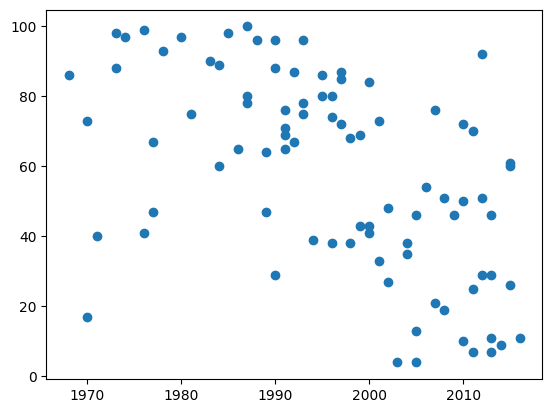

In [36]:
X = data["Year"].to_numpy().reshape(-1, 1)
y = data["Score"].to_numpy()

plt.plot(X, y, "o")

pass

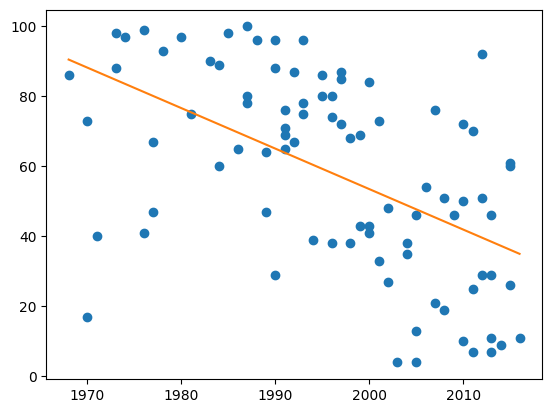

In [37]:
reg = LinearRegression()
reg.fit(X, y)

plt.plot(X, y, "o")
plt.plot(X, reg.predict(X))

pass

In [38]:
print(f"The De Niro parameter: {reg.coef_.item():.03}")

The De Niro parameter: -1.16


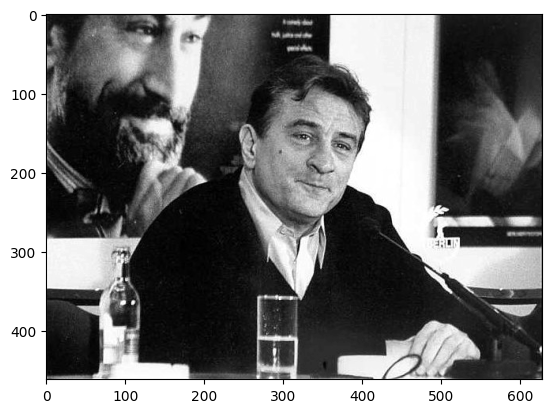

In [39]:
picture = iio.imread("de-niro.jpg")
plt.imshow(picture, cmap="gray")

In [40]:
from feat.detector import Detector

INFO:root:Loading Face model: retinaface
INFO:root:Loading Facial Landmark model: mobilefacenet
INFO:root:Loading facepose model: img2pose
INFO:root:Loading AU model: xgb
INFO:root:Loading emotion model: resmasknet
  0%|          | 0/1 [00:00<?, ?it/s]INFO:root:detecting faces...
INFO:root:detecting landmarks...
INFO:root:RESCALING WARNING: image_operations.extract_face_from_bbox() is rescaling cropped img with shape torch.Size([3, 188, 188]) to 112
INFO:root:RESCALING WARNING: image_operations.extract_face_from_bbox() is rescaling cropped img with shape torch.Size([3, 237, 233]) to 112
INFO:root:detecting poses...
INFO:root:detecting aus...
INFO:root:detecting emotions...
INFO:root:inverting face transform...
INFO:root:inverting landmark transform...
INFO:root:creating fex output...
100%|██████████| 1/1 [00:01<00:00,  1.21s/it]


,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore,x_0,x_1,x_2,x_3,x_4,...,AU43,anger,disgust,fear,happiness,sadness,surprise,neutral,input,frame
0,275.810258,94.044870,121.486934,158.169345,0.999689,270.548960,267.957097,266.609612,267.527924,272.702308,...,0.049904,0.014321,0.000402,0.000456,0.023302,0.049322,0.017057,0.895140,de-niro.jpg,0
1,7.356203,-1.619905,191.797031,217.981537,0.983789,34.712728,28.215891,25.119856,27.540712,39.890911,...,0.117975,0.039382,0.000023,0.000275,0.077844,0.136848,0.000787,0.744841,de-niro.jpg,0


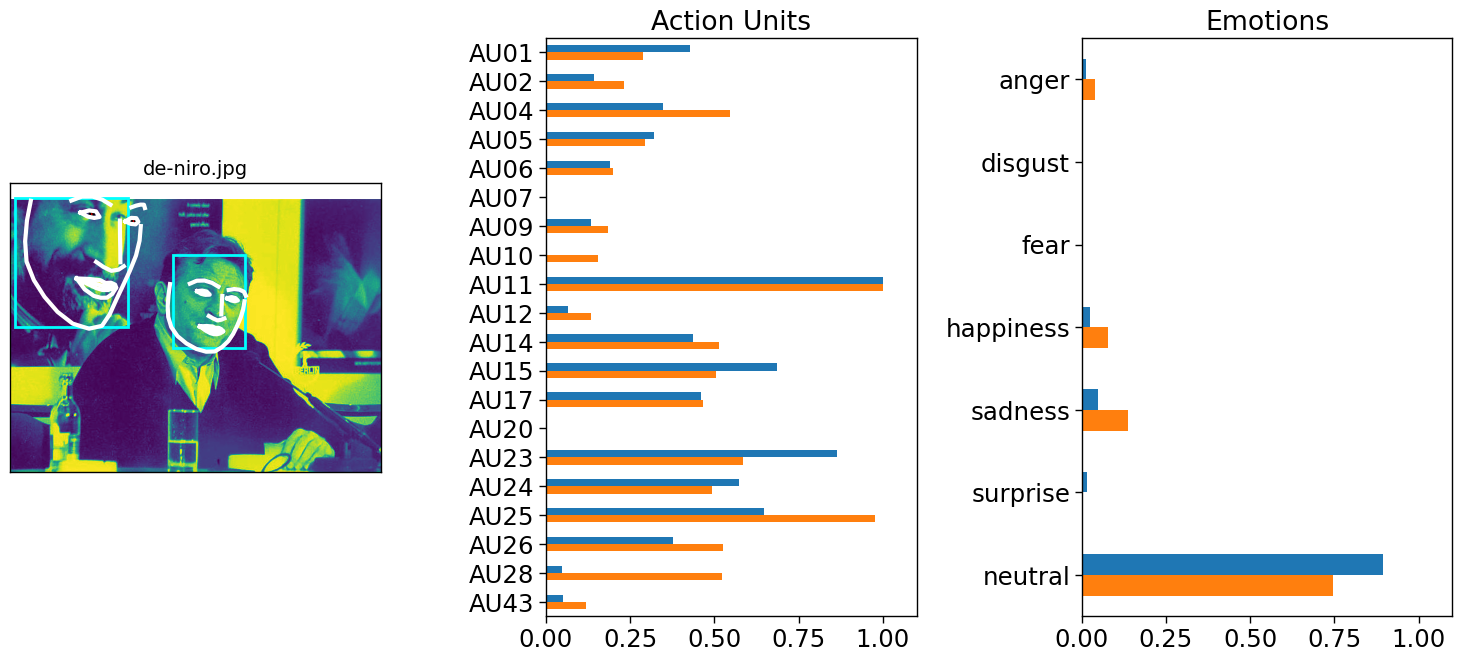

In [41]:
detector = Detector(device="cpu")
de_face = detector.detect_image("de-niro.jpg")
de_face.plot_detections()
de_face

## Evaluation

Please send us the following data in the corresponding Studium page:

* Your **NAME**, exactly as you wrote it above.
* Your **lucky number**.
* Your **cursed number**.
* Robert De Niro's **shortest movie title**.
* The **De Niro paremeter**.